*** $\textbf{1.}$Comment on the significance of the newly added regularizer term
$ \frac{\lambda}{2}x^Tx$, when compared to problem (1).**

**The parameter
 in the function, $f(x)$
 is $\lambda$ regularisation or tuning parameters which acts as a tool so that the value of weight in the regression model(x here) also have a cost. So if the value of $\lambda$
 is very large then it means there is a huge cost associated with increasing the value of x, so when $\lambda$
 is large, the weights are shrinked so that our overall cost, $f(x)$
 is minimised. When $\lambda$
 is very low or even 0 then it doesnt matter much even if the vector x takes large value, the panelty then is very low. When
 $\lambda$=0, it becomes the original least square loss function.**

**$\textbf{2.}$ Write Python functions to compute the function value, gradient, and Hessian of $f_\lambda$**

In [10]:
import numpy as np
def evalf(A,x,y,n_feat, n, lamb):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert lamb > 0

  f = np.matmul(A,x) - y

  return 0.5*(np.linalg.norm(f))**2  + 0.5*lamb*(np.matmul(x.T , x))


def evalg(A,x,y,n_feat, n, lamb):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert lamb > 0

  d = np.matmul(A,x) - y
  g = np.matmul(A.T , d) + lamb*x

  return g



def evalh(A,x,y,n_feat, n, lamb):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  h = np.matmul(A.T , A) + lamb*np.identity(n_feat)

  return h


**3. For λ ∈ {10−3
, 10−2
, 10−1
, 1}, perform the following: with a starting of x
0 = [0, 0, . . . , 0]T ∈ R10, solve the
equation 1 using Newton and BFGS methods with backtracking line search (use α
0 = 0.99, ρ = 0.5, γ = 0.5 for
backtracking line search and tau = 10−5
).**

In [11]:
def compute_steplength_backtracking_scaled_direction(A,x,y, n_feat, n ,lamb  ,gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(gradf) is np.ndarray and gradf.shape == (n_feat,1)
  assert type(direction) is np.ndarray and direction.shape == (n_feat, n_feat)
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.

  alpha = alpha_start
  p = -gradf

  while (evalf(A, x + alpha*np.matmul(direction,p), y, n_feat, n,lamb) > (evalf(A,x,y,n_feat,n,lamb) + gamma * alpha * np.matmul(gradf.T, np.matmul(direction, p))) ):
    alpha = alpha*rho

  return alpha


#line search type
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1



def find_minimizer_Newtonmethod(A, start_x, y, n_feat,  n,lamb, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(start_x) is np.ndarray and start_x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert type(tol) is float and tol>=0

  x = start_x
  g_x = evalg(A,x,y,n_feat,n,lamb)


  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  x_k = []

  #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):

    d = np.linalg.inv(evalh(A,x,y,n_feat,n,lamb))

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(A,x,y,n_feat,n,lamb,g_x, d , alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.0

    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, step_length * np.matmul(d,g_x))
    k += 1
    x_k.append(x)
    g_x = evalg(A,x,y,n_feat,n,lamb)

  return x, k, x_k



def find_minimizer_BFGS(A, start_x, y, n_feat, n,lamb, tol,line_search_type,*args):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(start_x) is np.ndarray and start_x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert type(tol) is float and tol>=0


  x = start_x
  k = 0
  g_new = evalg(A,x,y,n_feat,n,lamb)
  B = np.identity(n_feat)
  x_k = []

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  while (np.linalg.norm(g_new) > tol):

    d = B

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(A,x,y,n_feat,n,lamb ,g_new, d , alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.0

    else:
      raise ValueError('Line search type unknown. Please check!')

    g_old = evalg(A,x,y,n_feat,n,lamb)
    p = np.matmul(-1*B, g_old)
    x = x + step_length * p
    s = step_length * p
    g_new = evalg(A,x,y,n_feat,n,lamb)
    y_k = g_new - g_old

    mu = 1 / (np.matmul(y_k.T,s))
    term1 = np.identity(n_feat) - mu * np.matmul(s,y_k.T)
    term2 = np.identity(n_feat) - mu * np.matmul(y_k, s.T)

    B = np.matmul(term1, np.matmul(B ,term2))  +  mu * np.matmul(s,s.T)

    k = k + 1
    x_k.append(x)


  return x, k, x_k



In [12]:
A = np.random.randn(1000, 10)
z = np.zeros((10, 1))
for i in range(10):
    if i % 2 == 0:
        z[i] = np.random.uniform(i, i+1)
    else:
        z[i] = np.random.uniform(-(i+1), -1)


e = np.random.randn(1000, 1)
y = np.dot(A, z) + e

In [36]:
my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5
lamb_arr = [1e-3, 1e-2, 1e-1, 1]

x_nwtn = []
x_bfgs= []
x_iterates_nwtn = []
x_iterates_bfgs = []

for lamb in lamb_arr:
  a_n, b_n, c_n  = find_minimizer_Newtonmethod(A,my_x,y,10,1000,lamb,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  x_nwtn.append(a_n)
  x_iterates_nwtn.append(c_n)

  a_b, b_b, c_b = find_minimizer_BFGS(A,my_x,y,10,1000,lamb,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  x_bfgs.append(a_b)
  x_iterates_bfgs.append(c_b)

**4. For Newton’s method prepare the following plots and discuss relevant observations:
• Prepare a single plot where you depict the values log(||x
k −x
∗
||2) against iterations k = 0, 1, 2, ..., for each
value of λ (use different colors for different λ values; if necessary, add zoomed versions of the plots to
depict the behavior clearly, and use appropriate legends in your plots). Comment on the convergence rates
of the iterates for each value of λ.
• Prepare a different plot for plotting log(||f(x
k
) − f(x
∗
)||2) against the iterations, for each value of λ (use
different colors for different λ value; if necessary, add zoomed versions of the plots to depict the behavior
clearly and use appropriate legend in your plots). Comment on the convergence rates of the objective
function values.**

<ipython-input-21-ec06d81a35bf>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_norm_fx.append(float(np.log(np.abs(  evalf(A,xk,y,10,1000,lamb_arr[i]) - evalf(A,x_nwtn[i],y,10,1000,lamb_arr[i])))))
<ipython-input-21-ec06d81a35bf>:10: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_nwtn[i])))
<ipython-input-21-ec06d81a35bf>:11: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(float(np.log(np.abs(  evalf(A,xk,y,10,1000,lamb_arr[i]) - evalf(A,x_nwtn[i],y,10,1000,lamb_arr[i])))))


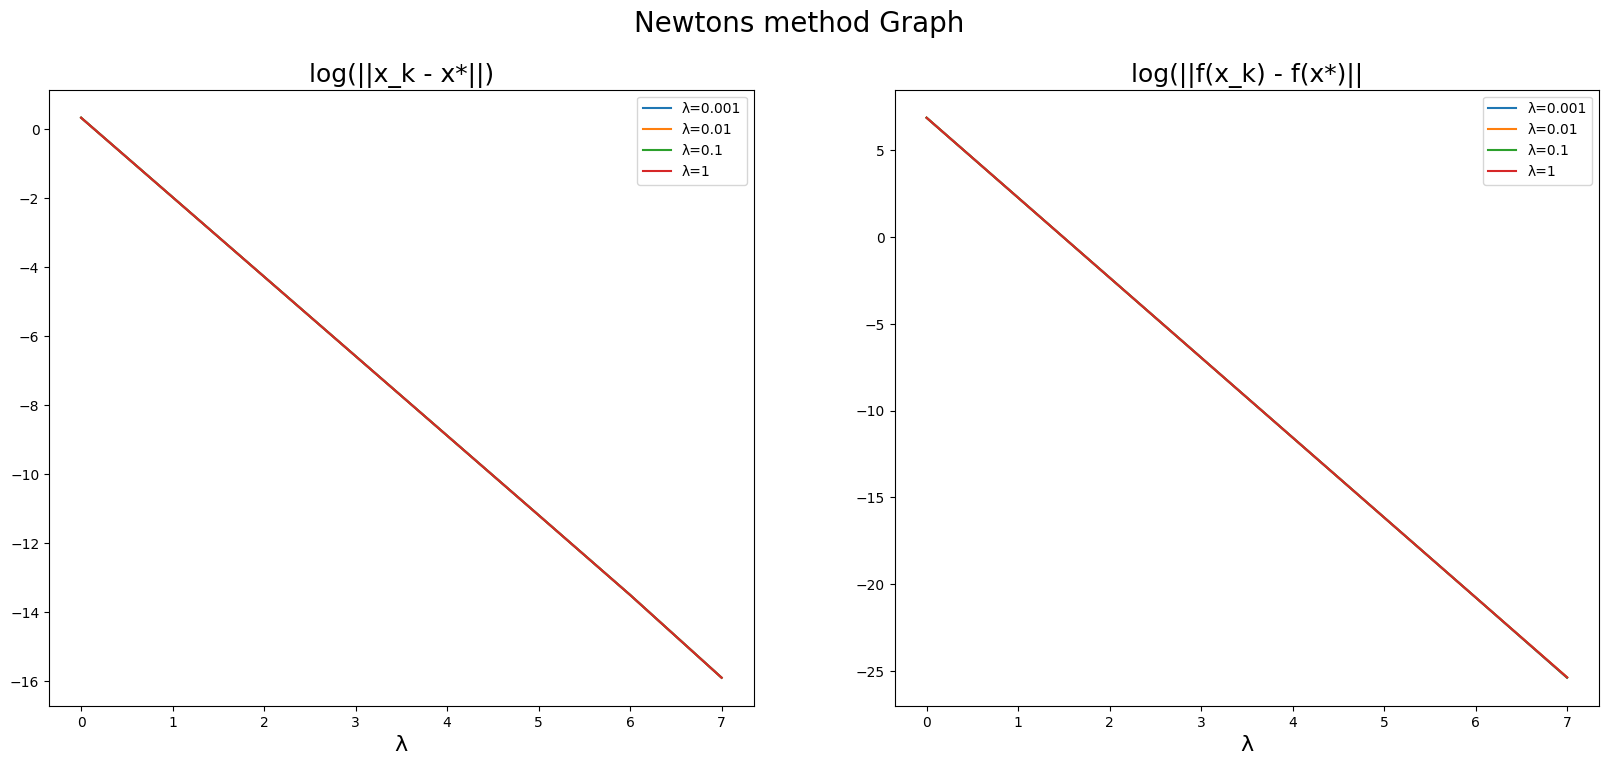

In [21]:
import matplotlib.pyplot as plt
fig, axe = plt.subplots(1,2,figsize= (20,8))

for i in range(len(lamb_arr)):

  log_norm = []
  log_norm_fx = []

  for xk in x_iterates_nwtn[i]:
    log_norm.append(np.log(np.linalg.norm(xk - x_nwtn[i])))
    log_norm_fx.append(float(np.log(np.abs(  evalf(A,xk,y,10,1000,lamb_arr[i]) - evalf(A,x_nwtn[i],y,10,1000,lamb_arr[i])))))


  fig.suptitle('Newtons method Graph', fontsize=20)
  axe[0].plot(np.arange(len(x_iterates_nwtn[i])),log_norm, label='λ={}'.format(lamb_arr[i])    )
  axe[0].set_title('log(||x_k - x*||)', fontsize = 18)
  axe[0].set_xlabel('λ', fontsize = 16)
  axe[0].legend()


  axe[1].plot(np.arange(len(x_iterates_nwtn[i])),log_norm_fx, label='λ={}'.format(lamb_arr[i])  )
  axe[1].set_title('log(||f(x_k) - f(x*)||', fontsize = 18)
  axe[1].set_xlabel('λ', fontsize = 16)
  axe[1].legend()

**Observation : We observe that the rate of convergence in the above graphs has almost no effect on changing the value of
. There is no significant difference on the convergence of the solution by changing lambda and hecnce all the lines are appproximately equal to each other and overlap..**

**5. For BFGS method prepare the following plots and discuss the relevant observations:
• Prepare a single plot where you depict the values log(||x
k −x
∗
||2) against iterations k = 0, 1, 2, ..., for each
value of λ (use different colors for different λ values; if necessary, add zoomed versions of the plots to
depict the behavior clearly, and use appropriate legends in your plots). Comment on the convergence rates
of the iterates for each value of λ.
• Prepare a different plot for plotting log(||f(x
k
) − f(x
∗
)||2) against the iterations, for each value of λ (use
different colors for different λ value; if necessary, add zoomed versions of the plots to depict the behavior
clearly and use appropriate legend in your plots). Comment on the convergence rates of the objective
function values.**


<ipython-input-19-02b385e486b0>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_norm_fx.append(float(np.log(np.abs(  evalf(A,xk,y,10,1000,lamb_arr[i]) - evalf(A,x_bfgs[i],y,10,1000,lamb_arr[i])))))
<ipython-input-19-02b385e486b0>:9: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_bfgs[i])))
<ipython-input-19-02b385e486b0>:10: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(float(np.log(np.abs(  evalf(A,xk,y,10,1000,lamb_arr[i]) - evalf(A,x_bfgs[i],y,10,1000,lamb_arr[i])))))


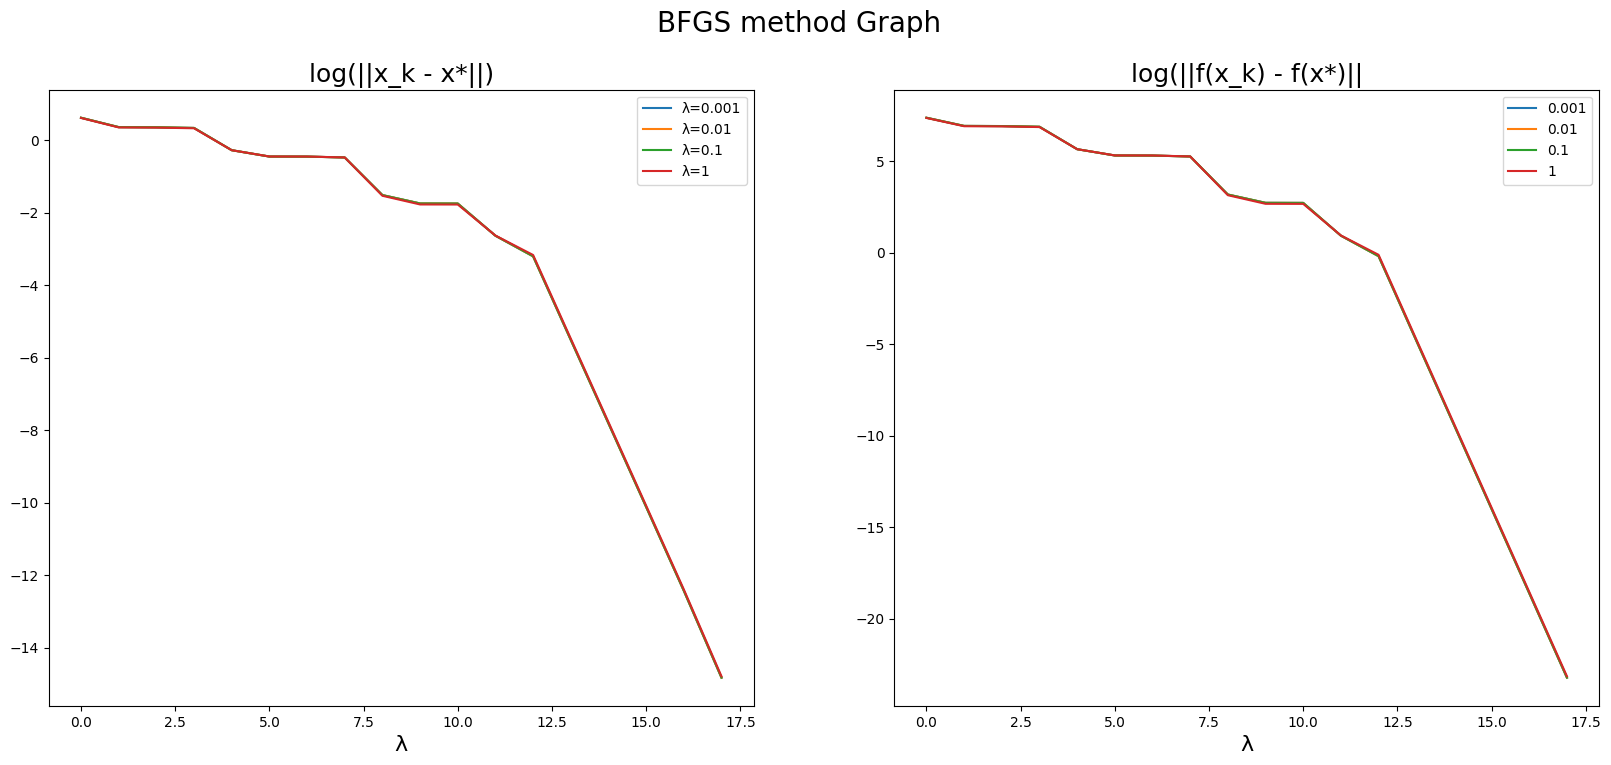

In [19]:

fig, axe = plt.subplots(1,2,figsize= (20,8))

for i in range(len(lamb_arr)):

  log_norm = []
  log_norm_fx = []

  for xk in x_iterates_bfgs[i]:
    log_norm.append(np.log(np.linalg.norm(xk - x_bfgs[i])))
    log_norm_fx.append(float(np.log(np.abs(  evalf(A,xk,y,10,1000,lamb_arr[i]) - evalf(A,x_bfgs[i],y,10,1000,lamb_arr[i])))))


  fig.suptitle('BFGS method Graph', fontsize=20)
  axe[0].plot(np.arange(len(x_iterates_bfgs[i])),log_norm, label='λ={}'.format(lamb_arr[i]) )
  axe[0].set_title('log(||x_k - x*||)', fontsize = 18)
  axe[0].set_xlabel('λ', fontsize = 16)
  axe[0].legend()


  axe[1].plot(np.arange(len(x_iterates_bfgs[i])),log_norm_fx, label='{}'.format(lamb_arr[i])  )
  axe[1].set_title('log(||f(x_k) - f(x*)||', fontsize = 18)
  axe[1].set_xlabel('λ', fontsize = 16)
  axe[1].legend()

**We observe that the rate of convergence in the above graphs has almost no effect on changing the value of lambda. There is no significant difference on the convergence of the solution by changing lambda and hecnce all the lines are appproximately equal to each other and overlap.**

**6. Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the time
taken by both methods for each value of λ.**

In [29]:
import pandas as pd
from timeit import default_timer as timer
my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5
lamb_arr = [1e-3, 1e-2, 1e-1, 1]

x_nwtn = []
x_bfgs= []
x_iterates_nwtn = []
x_iterates_bfgs = []
time_nwtn = []
time_bfgs = []

for lamb in lamb_arr:

  t_start = timer()
  a_n, b_n, c_n  = find_minimizer_Newtonmethod(A,my_x,y,10,1000,lamb,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  t_end = timer()
  time_nwtn.append(t_end - t_start)

  x_nwtn.append(a_n)
  x_iterates_nwtn.append(c_n)

  t_start = timer()
  a_b, b_b, c_b = find_minimizer_BFGS(A,my_x,y,10,1000,lamb,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  t_end = timer()
  time_bfgs.append(t_end - t_start)
  x_bfgs.append(a_b)
  x_iterates_bfgs.append(c_b)



dic = {'λ' : lamb_arr , 'z' : [z for j in range(len(lamb_arr))],'X_optimal_Nwtn' : x_nwtn , 'F(x)_optimal_Nwtn' : [evalf(A,my_x,y,10,1000,lamb) for lamb in lamb_arr] , 'Iterations_Nwtn' : [len(x_iterates_nwtn[j]) for j in range(len(lamb_arr))] , 'time' : time_nwtn }
df = pd.DataFrame(dic)
display(df)

print('\n\n')

dic2 = {'λ' : lamb_arr , 'z' : [z for j in range(len(lamb_arr))],'X_optimal_bfgs' : x_bfgs , 'F(x)_optimal_bfgs' : [evalf(A,my_x,y,10,1000,lamb) for lamb in lamb_arr] , 'Iterations_bfgs' : [len(x_iterates_bfgs[j]) for j in range(len(lamb_arr))] , 'time' : time_bfgs }
df2 = pd.DataFrame(dic2)
df2


,λ,z,X_optimal_Nwtn,F(x)_optimal_Nwtn,Iterations_Nwtn,time
0,0.001,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24805863265676445], [-1.639545820954569], ...",[[96504.48560947536]],9,0.014789
1,0.010,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24805957392801933], [-1.6395323678776559],...",[[96504.48560947536]],9,0.002097
2,0.100,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24806898185613072], [-1.6393978491851866],...",[[96504.48560947536]],9,0.002608
3,1.000,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24816258363173171], [-1.6380538688428974],...",[[96504.48560947536]],9,0.002112


,λ,z,X_optimal_bfgs,F(x)_optimal_bfgs,Iterations_bfgs,time
0,0.001,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24805863194894157], [-1.6395458178417903],...",[[96504.48560947536]],19,0.013886
1,0.010,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24805957322140035], [-1.6395323647683022],...",[[96504.48560947536]],19,0.013115
2,0.100,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24806898116145565], [-1.6393978461102814],...",[[96504.48560947536]],19,0.013373
3,1.000,"[[0.22852667305014784], [-1.671624511677897], ...","[[0.24816258304723243], [-1.6380538661319954],...",[[96504.48560947536]],19,0.013943
